In [1]:
### Import necessary packages.

# Packages for preprocessing
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import calendar
from datetime import date
import seaborn as sns

# Packages for Testing for MultiCollinearity 
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Packages for Logistic (also known as Logit Regression)
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import and save the data sourced from Kaggle.
data = pd.read_csv("hotel_bookings.csv")

In [3]:
### Investigate if there are any null values that will interfere with our regrssion model.

#Write a code to count the number of null values
null_counts = data.isnull().sum()
print("Count of null values (before cleaning) per variable/column:")
print(null_counts)

Count of null values (before cleaning) per variable/column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                          

In [4]:
# Resources for above code:
# - Pandas Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
#   purpose: To find a formula that would allow us to print unique value counts.

In [5]:
# Drop the 4 observations with NA values in the children column because that variable is 
# suspected to be needed for our logistic regression model.
# The other three columns with NAs will not be used in the regression model
# because they identify the country of the customer(EXPLAIN), the agent id and the company id.
data.dropna(subset=['children'], inplace=True)

In [6]:
# Confirm the children column no longer has NAs
#Write a code to count the number of null values
null_counts = data.isnull().sum()
print("Count of null values (before cleaning) per variable/column:")
print(null_counts)

Count of null values (before cleaning) per variable/column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                          

In [7]:
# Print the column names to consider what columns might need to be 
# added or changed.
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


## Preprocessing Steps
Considering that there are many categorical variables which we seek to explore, that we acknowledge that we cannot keep in the regression model due to multicollinearity concerns, we are creating transformed variables that can be used after our exploratory analysis IF they are determined to possibly be a statistically significant variable. 

In [8]:
# New Variable #1: Creating a column that indicates whether the customer recieved the room they requested 
data['reserved_is_assigned'] = np.where(data['reserved_room_type'] == data['assigned_room_type'], 1, 0)

# Examine the newly created variable
data['reserved_is_assigned'].value_counts()

reserved_is_assigned
1    104469
0     14917
Name: count, dtype: int64

In [9]:
# Resources for above code:
# - Data Quest: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
#   purpose: To know how to use np.where to add a column that populates based on whether a statement is true or false

In [10]:
# New Variable #2: Create a column for total length of stay 
data['total_length_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Examine the newly created variable
data['total_length_of_stay'].describe()

# Note: When using this variable do not use adults, children, babies

count    119386.000000
mean          3.427914
std           2.557444
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_length_of_stay, dtype: float64

In [11]:
# New Variable #3: Convert the month name to month numbers.
# The goal of doing this is to later be used to convert the date column 
# to a day of the week column using the calendar package.

# Save a dictionary of month names (key) to month numbers (values)
month_mapping = {'January': 1,
                 'February': 2,
                 'March': 3,
                 'April': 4,
                 'May': 5,
                 'June': 6,
                 'July': 7,
                 'August': 8,
                 'September': 9,
                 'October': 10,
                 'November': 11,
                 'December': 12}

# Use the map function to create the new variable, change each month name observation 
# to the corresponding number estavlished in the saved dictionary
data['arrival_date_month_new'] = data['arrival_date_month'].map(month_mapping)

# Note: This does not have a current use  

In [12]:
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new']


In [13]:
# New Variable #4 and 5: 

# #4: With arrival_date_month convert the arrival date columns to a column with the date data type
# Convert the arrival date columns to one cohesive date column
data['arrival_date'] = pd.to_datetime(dict(year=data.arrival_date_year, month=data.arrival_date_month_new, day=data.arrival_date_day_of_month))


# #5: Create a new column converting the newly formed arrival date(in datetime form) to the day of the week (i.e. Monday or Saturday, etc.)
data['arrival_day_name'] = data['arrival_date'].dt.day_name()

In [14]:
# Resources for the above code:
# - Statology: https://www.statology.org/pandas-create-date-column-from-year-month-day/
#   purpose: To convert the 'arrival_date_year', 'arrival_date_month' and 'arrival_date_day_of_month' to one
#            date column.

# - PYnative: https://pynative.com/python-get-the-day-of-week/
#   purpose: to find a formula that will minimize the number of steps to convert the arrival date to the day of 
#            the week - the website gave us the following : (fill in object name).day_name() when using that column 
#            we obtained the following error: 'Series' object has no attribute 'day_name' 

# - pandas.Series.dt.day_name from Pandas Documentation: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html
#   purpose: To find syntax for the series data in our dataframe column; allowed us to determine we just need to add .dt before the.day_name
#            formula.

In [15]:
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new', 'arrival_date', 'arrival_day_name']


In [16]:
# Check the created columns unique values using the created loop from earlier that reveals the different observations 
# that are within each column and their respective count 
for column in data:
    unique_counts = data[column].value_counts()
    
    print("\nCounts of unique observations in column", column, ":")
    print(unique_counts)


Counts of unique observations in column hotel :
hotel
City Hotel      79326
Resort Hotel    40060
Name: count, dtype: int64

Counts of unique observations in column is_canceled :
is_canceled
0    75166
1    44220
Name: count, dtype: int64

Counts of unique observations in column lead_time :
lead_time
0      6345
1      3458
2      2068
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64

Counts of unique observations in column arrival_date_year :
arrival_date_year
2016    56707
2017    40687
2015    21992
Name: count, dtype: int64

Counts of unique observations in column arrival_date_month :
arrival_date_month
August       13873
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

Counts of unique observations in column arr

In [17]:
# Upon our first attempt at creating our logistic regression we realized
# that we were having issues due to the data type of the independent variables
# being that a column of objects can't by run in logit so we need to preprocess said columns

# Up until this point these are the data types of the variables used in the 1st regression model and their 
# datatypes

#const                             float64
#hotel                              object
#lead_time                           int64
#stays_in_weekend_nights             int64
#stays_in_week_nights                int64
#adults                              int64
#children                          float64
#babies                              int64
#meal                               object
#market_segment                     object
#distribution_channel               object
#is_repeated_guest                   int64
#previous_cancellations              int64
#previous_bookings_not_canceled      int64
#reserved_room_type                 object  - ignore: no documentation on the meaning of these rooms
#assigned_room_type                 object  - ignore: no documentation on the meaning of these rooms
#booking_changes                     int64
#deposit_type                       object
#days_in_waiting_list                int64
#customer_type                      object
#adr                               float64
#required_car_parking_spaces         int64
#total_of_special_requests           int64
#reserved_is_assigned                int64
#arrival_day_name                   object
#dtype: object

In [18]:
# Transformed Variable #1: Edit the hotel data type 
# 1: means resort hotels
# 0: means city hotels
data['hotel_binary'] = np.where(data['hotel'] == 'Resort Hotel', 1, 0)

# drop original column to run correlation matrix
data = data.drop(columns=['hotel'])

In [19]:
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new', 'arrival_date', 'arrival_day_name', 'hotel_binary']


In [20]:
# Transformed Variable #2: Make the categorical data type of meal to an ordinal data type
# (because there it goes from a hotel booking that includes no food --> a booking that includes all meals)

#BB - bed and breakfast - breakfast
#HB - half board - breakfast and one meal
#SC - self catering - no meals 
#Undefined - no category - no meals
#FB - full board - breakfast lunch and dinner

# Combine the SC and Undefined and Make this ordinal (No Meal, BB, HB, FB)
data['meal_ordinal'] = data['meal'].replace({'SC': 0, 'Undefined':0, 'BB': 1, 'HB': 2, 'FB': 3})

# drop original column to run correlation matrix
data = data.drop(columns=['meal'])

In [21]:
# Resources for the above code:
# - Linkedin article: https://www.linkedin.com/advice/0/how-can-you-handle-categorical-variables-logistic-regression-jdtzc
#   purpose: How to handle categorical/object data

# - Stack Overflow: https://stackoverflow.com/questions/72905311/python-pandas-replace-values-in-a-column-function
#   purpose: Change the columns categorical variables to ordinal/ numeric  

In [22]:
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new', 'arrival_date', 'arrival_day_name', 'hotel_binary', 'meal_ordinal']


In [23]:
# Transformed Variables #3: Make market_segment categories binary 
#Online TA        56476
#Offline TA/TO    24219
#Groups           19811
#Direct           12605
#Corporate         5295
#Complementary      743
#Aviation           237

data['mkt_online_ta'] = np.where(data['market_segment'] == 'Online TA', 1, 0)
data['mkt_offline_ta_to'] = np.where(data['market_segment'] == 'Offline TA/TO', 1, 0)
data['mkt_groups'] = np.where(data['market_segment'] == 'Groups', 1, 0)
data['mkt_direct'] = np.where(data['market_segment'] == 'Direct', 1, 0)
data['mkt_corporate'] = np.where(data['market_segment'] == 'Corporate', 1, 0)
data['mkt_complementary'] = np.where(data['market_segment'] == 'Complementary', 1, 0)
data['mkt_aviation'] = np.where(data['market_segment'] == 'Aviation', 1, 0)

# drop original column to run correlation matrix
data = data.drop(columns=['market_segment'])


In [24]:
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new', 'arrival_date', 'arrival_day_name', 'hotel_binary', 'meal_ordinal', 'mkt_online_ta', 'mkt_offline_ta_to', 'mkt_groups', 'mkt_direct', 'mkt_corporate', 'mkt_complementary', 'mkt_aviation']


In [25]:
# Transformed Variables #4: Make distribution_channel categories binary 
#TA/TO        97870
#Direct       14645
#Corporate     6677
#GDS            193
#Undefined        1 (exclude the creation column)

data['dst_ta_to'] = np.where(data['distribution_channel'] == 'TA/TO', 1, 0)
data['dst_direct'] = np.where(data['distribution_channel'] == 'Direct', 1, 0)
data['dst_corporate'] = np.where(data['distribution_channel'] == 'Corporate', 1, 0)
data['dst_gds'] = np.where(data['distribution_channel'] == 'GDS', 1, 0)

# drop original column to run correlation matrix
data = data.drop(columns=['distribution_channel'])


In [26]:
# Check updated columns
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new', 'arrival_date', 'arrival_day_name', 'hotel_binary', 'meal_ordinal', 'mkt_online_ta', 'mkt_offline_ta_to', 'mkt_groups', 'mkt_direct', 'mkt_corporate', 'mkt_complementary', 'mkt_aviation', 'dst_ta_to', 'dst_direct', 'dst_corporate', 'dst_gds']


In [27]:
# Transformed Variables #5: Make deposit_type categories binary 
#No Deposit    104637
#Non Refund     14587
#Refundable       162

data['dep_no'] = np.where(data['deposit_type'] == 'No Deposit', 1, 0)
data['dep_non_ref'] = np.where(data['deposit_type'] == 'Non Refund', 1, 0)
data['dep_ref'] = np.where(data['deposit_type'] == 'Refundable', 1, 0)

# drop original column to run correlation matrix
data = data.drop(columns=['deposit_type'])

In [28]:
# Check updated columns
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new', 'arrival_date', 'arrival_day_name', 'hotel_binary', 'meal_ordinal', 'mkt_online_ta', 'mkt_offline_ta_to', 'mkt_groups', 'mkt_direct', 'mkt_corporate', 'mkt_complementary', 'mkt_aviation', 'dst_ta_to', 'dst_direct', 'dst_corporate', 'dst_gds', 'dep_no', 'dep_non_ref', 'dep_ref']


In [29]:
# Transformed Variables #5: Make customer_type categories binary
#Transient          89613
#Transient-Party    25120
#Contract            4076
#Group                577

data['cust_transient'] = np.where(data['customer_type'] == 'Transient', 1, 0)
data['cust_transient_p'] = np.where(data['customer_type'] == 'Transient-Party', 1, 0)
data['cust_contract'] = np.where(data['customer_type'] == 'Contract', 1, 0)
data['cust_party'] = np.where(data['customer_type'] == 'Party', 1, 0)

# drop original column to run correlation matrix
data = data.drop(columns=['customer_type'])

In [30]:
# Check updated columns
print("The column names in the data dataset:")
print(list(data.columns))

The column names in the data dataset:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'reserved_is_assigned', 'total_length_of_stay', 'arrival_date_month_new', 'arrival_date', 'arrival_day_name', 'hotel_binary', 'meal_ordinal', 'mkt_online_ta', 'mkt_offline_ta_to', 'mkt_groups', 'mkt_direct', 'mkt_corporate', 'mkt_complementary', 'mkt_aviation', 'dst_ta_to', 'dst_direct', 'dst_corporate', 'dst_gds', 'dep_no', 'dep_non_ref', 'dep_ref', 'cust_transient', 'cust_transient_p', 'cust_contract', 'cust_party']


In [31]:
# Function to check if a column is binary (only contains two unique values: 0 and 1)
def is_binary(column):
    unique_values = data[column].dropna().unique()
    return len(unique_values) == 2 and set(unique_values) == {0, 1}

binary_columns = [col for col in data.columns if is_binary(col)]

print("Binary Variables in the Dataset:")
for col in binary_columns:
    unique_vals = data[col].dropna().unique()  # Get unique values for each binary column
    print(f"- {col}: Unique values -> {unique_vals}")

binary_data = data[binary_columns]
print("\nPreview of Binary Variables Data:")
print(binary_data.head())

Binary Variables in the Dataset:
- is_canceled: Unique values -> [0 1]
- is_repeated_guest: Unique values -> [0 1]
- reserved_is_assigned: Unique values -> [1 0]
- hotel_binary: Unique values -> [1 0]
- mkt_online_ta: Unique values -> [0 1]
- mkt_offline_ta_to: Unique values -> [0 1]
- mkt_groups: Unique values -> [0 1]
- mkt_direct: Unique values -> [1 0]
- mkt_corporate: Unique values -> [0 1]
- mkt_complementary: Unique values -> [0 1]
- mkt_aviation: Unique values -> [0 1]
- dst_ta_to: Unique values -> [0 1]
- dst_direct: Unique values -> [1 0]
- dst_corporate: Unique values -> [0 1]
- dst_gds: Unique values -> [0 1]
- dep_no: Unique values -> [1 0]
- dep_non_ref: Unique values -> [0 1]
- dep_ref: Unique values -> [0 1]
- cust_transient: Unique values -> [1 0]
- cust_transient_p: Unique values -> [0 1]
- cust_contract: Unique values -> [0 1]

Preview of Binary Variables Data:
   is_canceled  is_repeated_guest  reserved_is_assigned  hotel_binary  \
0            0                  0 

# Descriptive Analysis 

## Visualizations

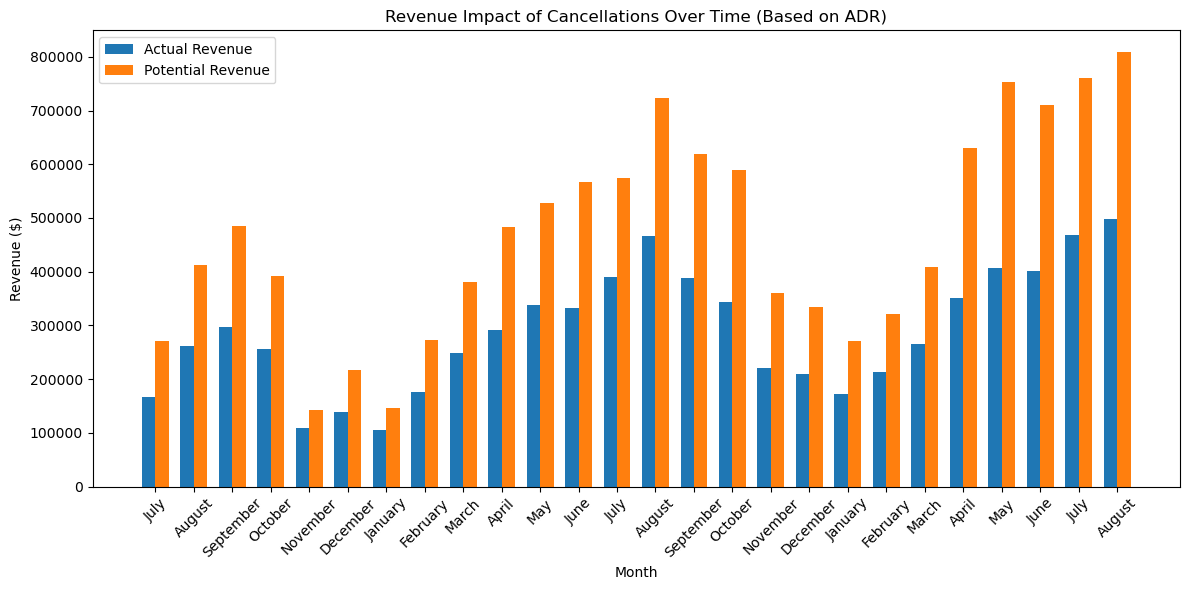

In [32]:
# 1. Impact on Management (Lost Revenue from Cancellations)
#actual revenue vs potential revenue 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

data['potential_revenue'] = data['adr']
data['actual_revenue'] = data['adr'] * (1 - data['is_canceled'])

monthly_revenue = data.groupby(['arrival_date_year', 'arrival_date_month'])[['actual_revenue', 'potential_revenue']].sum().reset_index()

monthly_revenue['arrival_date_month'] = pd.Categorical(monthly_revenue['arrival_date_month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values(['arrival_date_year', 'arrival_date_month'])

bar_width = 0.35
index = np.arange(len(monthly_revenue['arrival_date_month']))

plt.figure(figsize=(12, 6))

plt.bar(index, monthly_revenue['actual_revenue'], bar_width, label='Actual Revenue')

plt.bar(index + bar_width, monthly_revenue['potential_revenue'], bar_width, label='Potential Revenue')

plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Revenue Impact of Cancellations Over Time (Based on ADR)')
plt.xticks(index + bar_width / 2, monthly_revenue['arrival_date_month'], rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


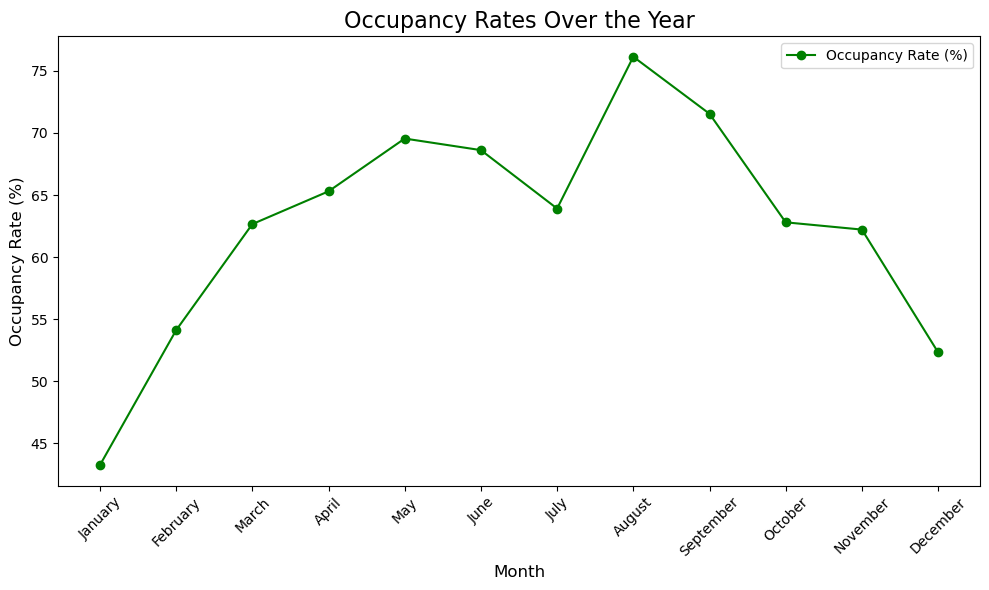

In [33]:
#2. Impacts on Occupancy Rates
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')

data['month_name'] = data['reservation_status_date'].dt.strftime('%B')

monthly_bookings = data.groupby('month_name').size()

occupied_bookings = data[data['is_canceled'] == 0].groupby('month_name').size()

occupancy_rate = (occupied_bookings / monthly_bookings) * 100

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
occupancy_rate = occupancy_rate.reindex(month_order)

plt.figure(figsize=(10, 6))
plt.plot(occupancy_rate.index, occupancy_rate, label='Occupancy Rate (%)', marker='o', color='green')
plt.title('Occupancy Rates Over the Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

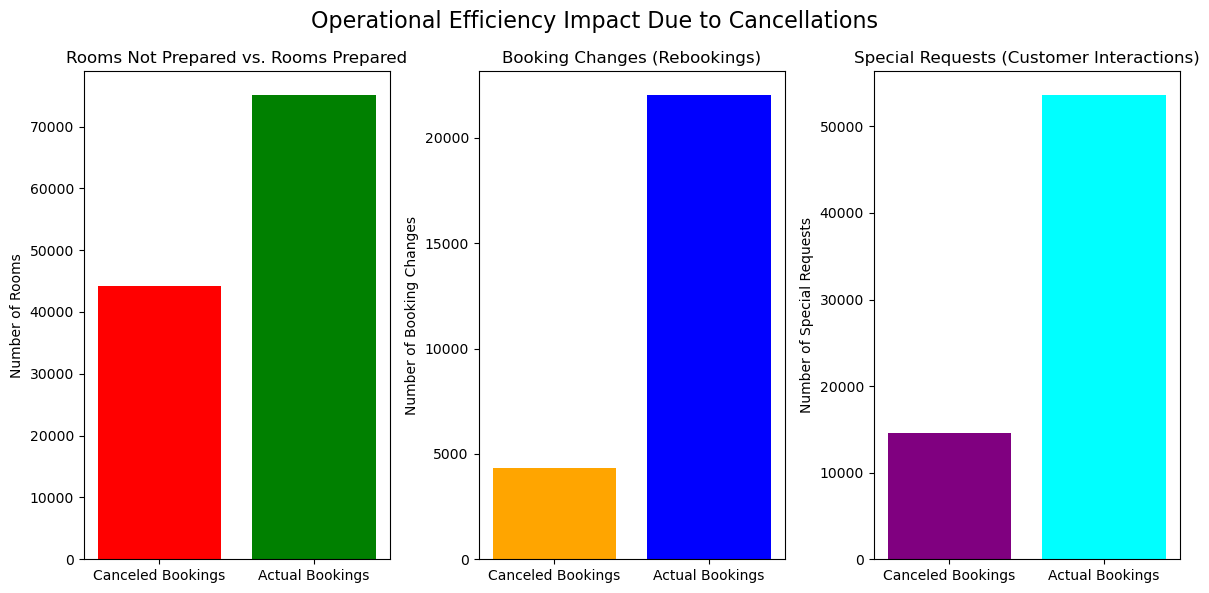

In [34]:
# 3. Impact of Cancellations on Administrative and Operational Workload
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')

canceled_data = data[data['is_canceled'] == 1]
actual_data = data[data['is_canceled'] == 0]

#Workload from Booking Changes (Rebooking and Compensation Requests)
canceled_booking_changes = canceled_data['booking_changes'].sum()
actual_booking_changes = actual_data['booking_changes'].sum()

#Workload from Special Requests (Customer Service Interaction)
canceled_special_requests = canceled_data['total_of_special_requests'].sum()
actual_special_requests = actual_data['total_of_special_requests'].sum()

#Decreased workload due to cancellations (Housekeeping and Room Preparation)
canceled_room_count = canceled_data.shape[0]  
actual_room_count = actual_data.shape[0]  

workload_labels = ['Canceled Bookings', 'Actual Bookings']
values = [canceled_room_count, actual_room_count]
booking_changes = [canceled_booking_changes, actual_booking_changes]
special_requests = [canceled_special_requests, actual_special_requests]

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.bar(workload_labels, values, color=['red', 'green'])
plt.title('Rooms Not Prepared vs. Rooms Prepared')
plt.ylabel('Number of Rooms')
plt.subplot(1, 3, 2)
plt.bar(workload_labels, booking_changes, color=['orange', 'blue'])
plt.title('Booking Changes (Rebookings)')
plt.ylabel('Number of Booking Changes')
plt.subplot(1, 3, 3)
plt.bar(workload_labels, special_requests, color=['purple', 'cyan'])
plt.title('Special Requests (Customer Interactions)')
plt.ylabel('Number of Special Requests')
plt.suptitle('Operational Efficiency Impact Due to Cancellations', fontsize=16)
plt.tight_layout()
plt.show()

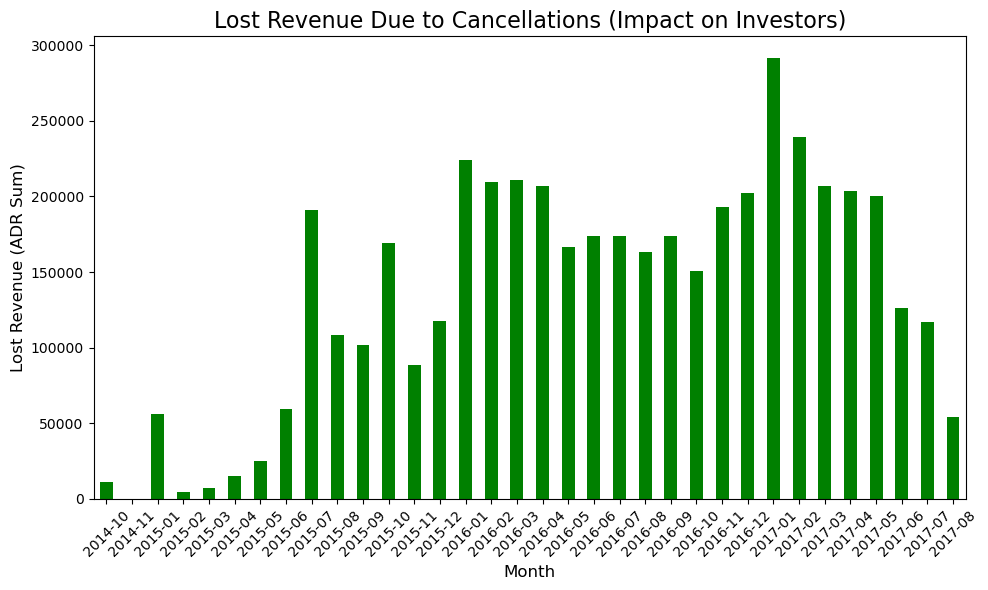

In [35]:
# 4. Impact on Investors (Lost Revenue Over Time)
data['month'] = data['reservation_status_date'].dt.to_period('M')
lost_revenue_monthly = data[data['is_canceled'] == 1].groupby('month')['adr'].sum()

plt.figure(figsize=(10, 6))
lost_revenue_monthly.plot(kind='bar', color='green')
plt.title('Lost Revenue Due to Cancellations (Impact on Investors)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Lost Revenue (ADR Sum)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

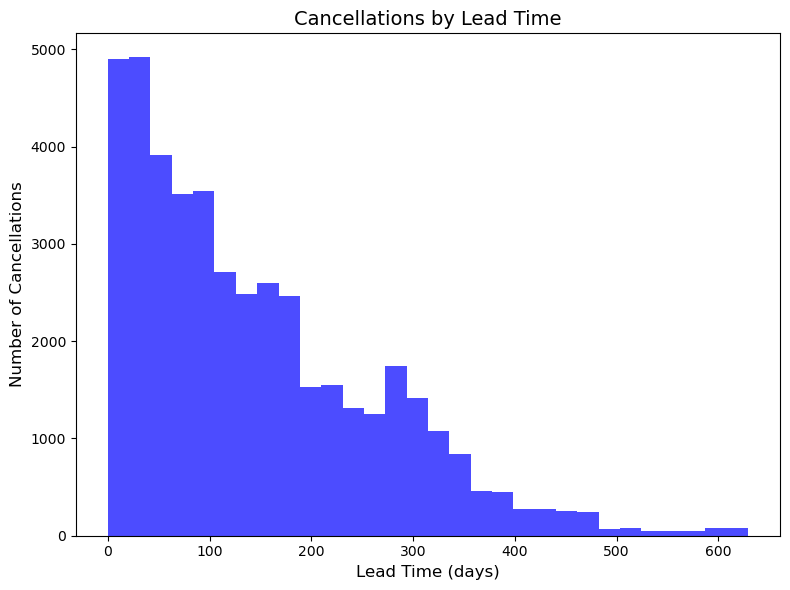

In [36]:
# Lead Time and Cancellations
canceled_data = data[data['is_canceled'] == 1]
plt.figure(figsize=(8, 6))
plt.hist(canceled_data['lead_time'], bins=30, color='blue', alpha=0.7)
plt.title('Cancellations by Lead Time', fontsize=14)
plt.xlabel('Lead Time (days)', fontsize=12)
plt.ylabel('Number of Cancellations', fontsize=12)
plt.tight_layout()
plt.show()


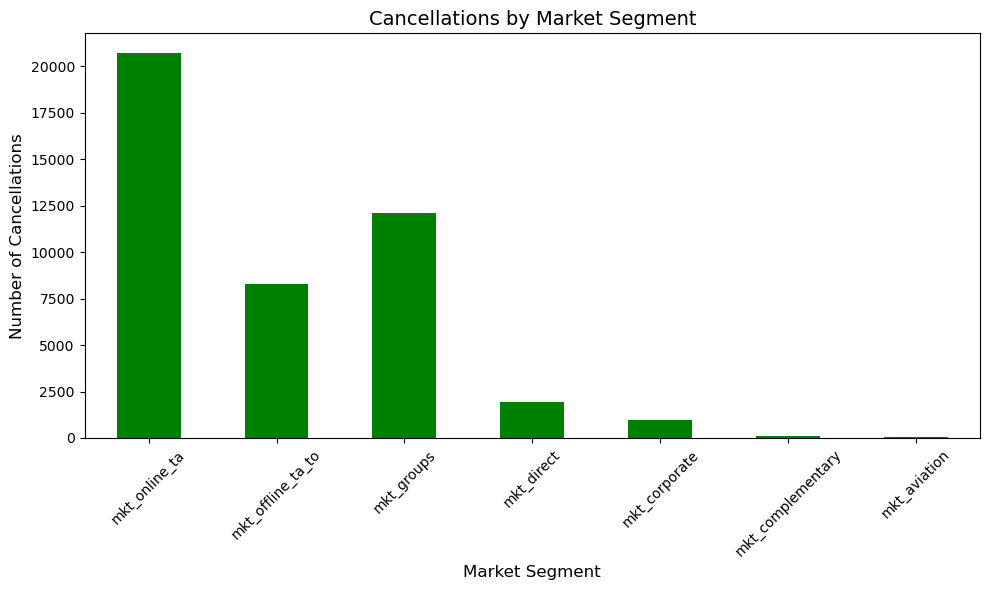

In [37]:
#Market Segment and Cancellations
market_segment_columns = ['mkt_online_ta', 'mkt_offline_ta_to', 'mkt_groups', 'mkt_direct', 'mkt_corporate', 'mkt_complementary', 'mkt_aviation']
market_segment_cancellations = data[data['is_canceled'] == 1][market_segment_columns].sum()

plt.figure(figsize=(10, 6))
market_segment_cancellations.plot(kind='bar', color='green')
plt.title('Cancellations by Market Segment', fontsize=14)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Number of Cancellations', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

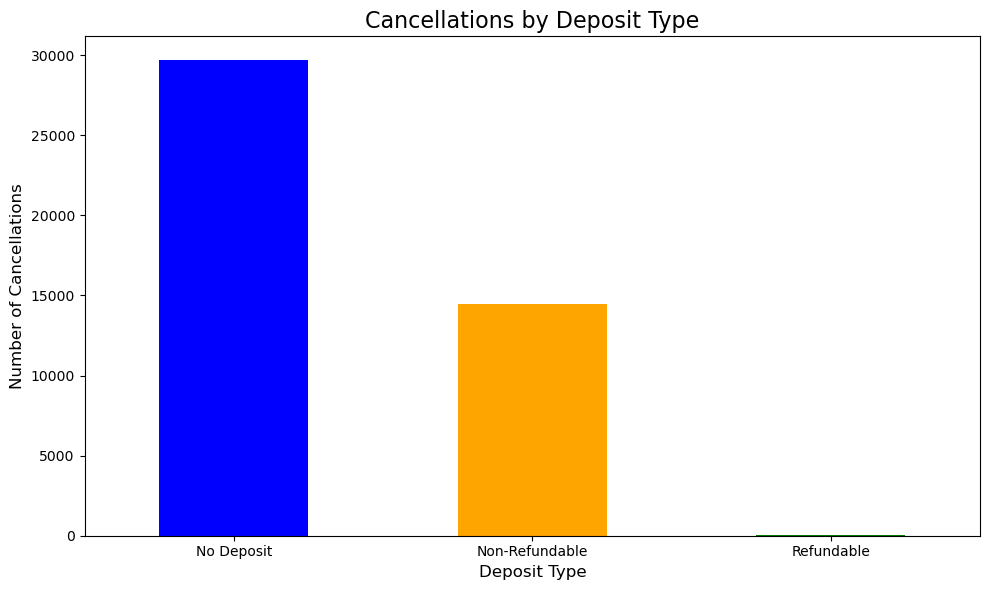

In [38]:
#Each deposit Type and Cancellations

deposit_columns = ['dep_no', 'dep_non_ref', 'dep_ref']
deposit_cancellations = data[data['is_canceled'] == 1][deposit_columns].sum()

deposit_cancellations.index = ['No Deposit', 'Non-Refundable', 'Refundable']
plt.figure(figsize=(10, 6))
deposit_cancellations.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Cancellations by Deposit Type', fontsize=16)
plt.xlabel('Deposit Type', fontsize=12)
plt.ylabel('Number of Cancellations', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

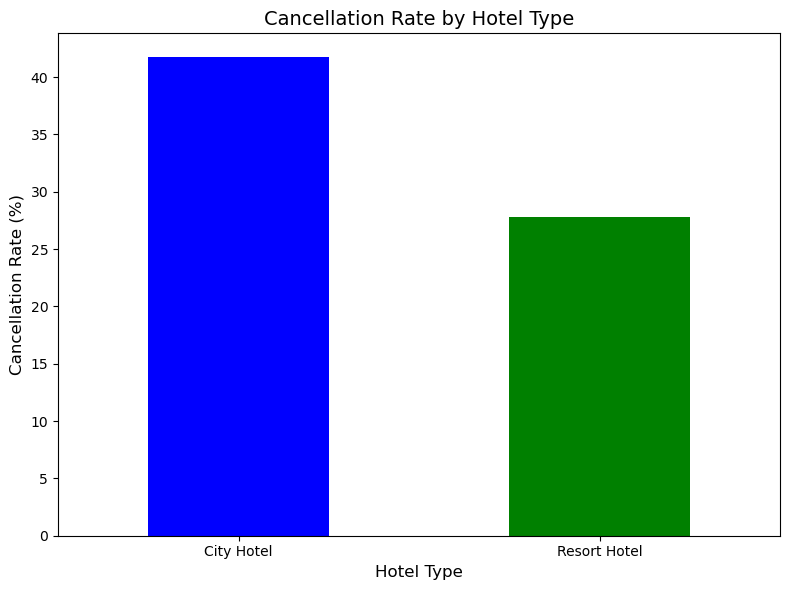

In [39]:
# Cancellation rate by hotel type
cancellation_by_hotel = data.groupby('hotel_binary')['is_canceled'].mean() * 100

plt.figure(figsize=(8, 6))
cancellation_by_hotel.plot(kind='bar', color=['blue', 'green'])
plt.title('Cancellation Rate by Hotel Type', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks([0, 1], ['City Hotel', 'Resort Hotel'], rotation=0)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

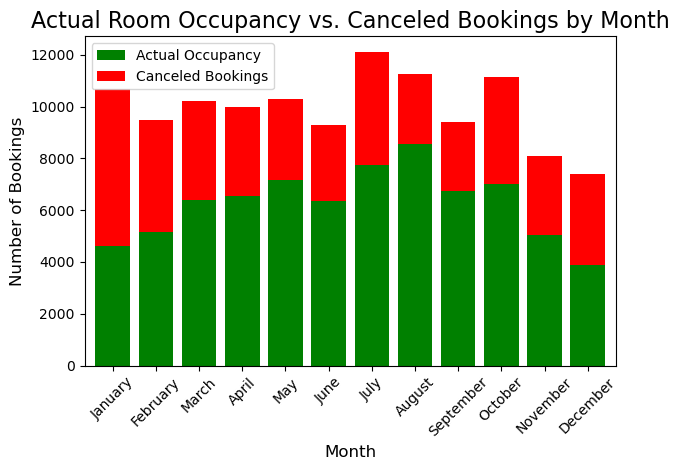

In [40]:
#Actual occupancy and canceled bookings by month 
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')

data['month_name'] = data['reservation_status_date'].dt.strftime('%B')

monthly_data = data.groupby(['month_name', 'is_canceled']).size().unstack(fill_value=0)

monthly_data.columns = ['Actual Occupancy', 'Canceled Bookings']

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(month_order)

plt.figure(figsize=(10, 6))
monthly_data.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.8)
plt.title('Actual Room Occupancy vs. Canceled Bookings by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression

### Step 1: Run Correlation Matrix on Continuous Independent  Variables

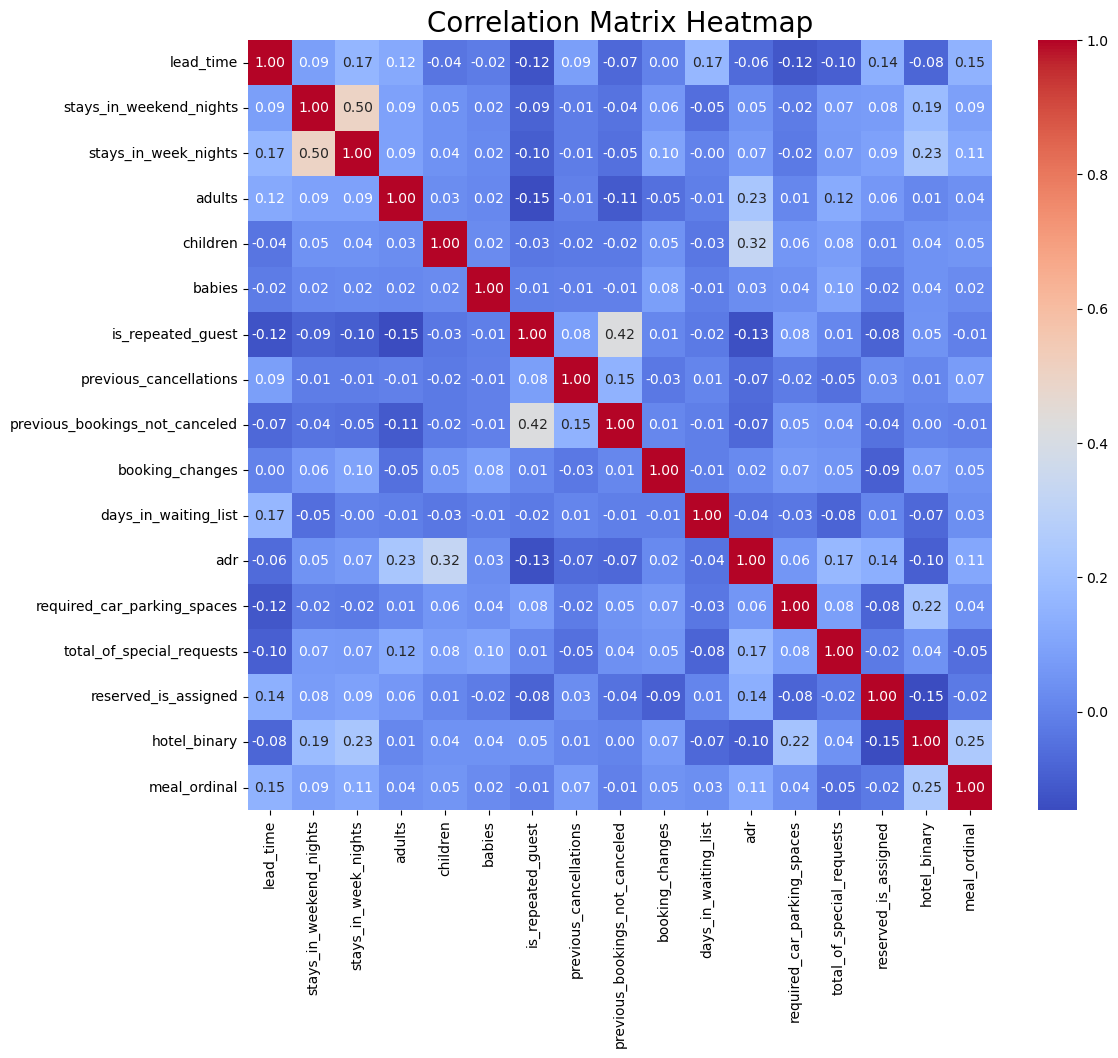

In [41]:
### EDITED CORRELATION MATRIX (EXCLUDING CATEGORICAL VARIABLES AND OUR DEPENDENT VARIABLE)
# Save a data frame subset for the correlation matrix
correlation_1 = data[['lead_time','stays_in_weekend_nights', 
                      'stays_in_week_nights', 'adults', 'children', 'babies', 
                      'is_repeated_guest', 'previous_cancellations', 
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
                      'total_of_special_requests','reserved_is_assigned',
                      'hotel_binary', 'meal_ordinal']] 

# Save the correlation matrix
correlation_matrix = correlation_1.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Show the plot
plt.show()


### Step 2: Test for Multicollinearity Using VIF values

In [43]:
# Test for Multicollinearity 
correlation_1 = data[['lead_time','stays_in_weekend_nights', 
                      'stays_in_week_nights', 'adults', 'children', 'babies', 
                      'is_repeated_guest', 'previous_cancellations', 
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
                      'total_of_special_requests','reserved_is_assigned',
                      'hotel_binary', 'meal_ordinal', 'mkt_online_ta', 
                      'mkt_offline_ta_to', 'mkt_groups', 'mkt_direct', 'mkt_corporate', 
                      'mkt_complementary', 'mkt_aviation', 'dst_ta_to', 'dst_direct', 
                      'dst_corporate', 'dst_gds', 'dep_no', 'dep_non_ref', 'dep_ref', 
                      'cust_transient', 'cust_transient_p', 'cust_contract', 
                      'cust_party']]

X = correlation_1
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

/Users/ninachristansen/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           feature           VIF
0                        lead_time  1.459296e+00
1          stays_in_weekend_nights  1.383375e+00
2             stays_in_week_nights  1.472680e+00
3                           adults  1.172315e+00
4                         children  1.145970e+00
5                           babies  1.021907e+00
6                is_repeated_guest  1.347090e+00
7           previous_cancellations  1.064429e+00
8   previous_bookings_not_canceled  1.290455e+00
9                  booking_changes  1.074464e+00
10            days_in_waiting_list  1.058761e+00
11                             adr  1.456708e+00
12     required_car_parking_spaces  1.099246e+00
13       total_of_special_requests  1.283051e+00
14            reserved_is_assigned  1.107456e+00
15                    hotel_binary  1.354687e+00
16                    meal_ordinal  1.275643e+00
17                   mkt_online_ta           inf
18               mkt_offline_ta_to           inf
19                  

/Users/ninachristansen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [70]:
# Resources for the above code and subsequent code using this method:
# - Geeks for Geeks: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
#   purpose: to determine how to avoid errors running our logistic regression model 


In [45]:
# Because the binary market segment, distribution channel, deposit type, and most of the customer types have 
# high VIF values we will exclude them to ensure our model will run

# Update the variables that will be used to inquire if there will be any new issues of multicollinearity
correlation_2 = data[['lead_time','stays_in_weekend_nights', 
                      'stays_in_week_nights', 'adults', 'children', 'babies', 
                      'is_repeated_guest', 'previous_cancellations', 
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
                      'total_of_special_requests','reserved_is_assigned',
                      'hotel_binary', 'meal_ordinal', 'cust_contract']]

# Test for Multicollinearity 
X = correlation_2
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif_data

,feature,VIF
0,lead_time,2.302737
1,stays_in_weekend_nights,2.535093
2,stays_in_week_nights,3.914573
3,adults,8.856187
4,children,1.203774
5,babies,1.024959
6,is_repeated_guest,1.274933
7,previous_cancellations,1.057685
8,previous_bookings_not_canceled,1.249945
9,booking_changes,1.149006


### Step 3: Run Logistic Regression Models Trying To Determine Which Model Holds The Most Predictive Value 
This provides us with our data's statistically significant variables

In [55]:
# Define the dependent and independent variables
mod_1_columns = data[['lead_time','stays_in_weekend_nights', 
                      'stays_in_week_nights', 'adults', 'children', 'babies', 
                      'is_repeated_guest', 'previous_cancellations', 
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
                      'total_of_special_requests','reserved_is_assigned',
                      'hotel_binary', 'meal_ordinal', 'cust_contract']]
# this is correlation_2 dataframe from running the second VIF calculation without the is_canceled (our dependent variable)
x_mod_1 = mod_1_columns
y_mod_1 = data['is_canceled']

# Build the model and fit the data
log_reg_1 = sm.Logit(y_mod_1, x_mod_1).fit()

# Print our regression model 
print(log_reg_1.summary())

/Users/ninachristansen/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.520045
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119368
Method:                           MLE   Df Model:                           17
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.2111
Time:                        13:30:46   Log-Likelihood:                -62086.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.0046   7.33e-05     62.252    

/Users/ninachristansen/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [56]:
# In an effort to improve the model's performance we replaced 
# stays_in_weekend_nights and stays_in_week_nights with total_length_of_stay

#Define the dependent and independent variables
mod_2_columns = data[['lead_time','total_length_of_stay', 'adults', 'children', 'babies', 
                      'is_repeated_guest', 'previous_cancellations', 
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                      'total_of_special_requests','reserved_is_assigned',
                      'hotel_binary', 'meal_ordinal', 'cust_contract']]

x_mod_2 = mod_2_columns
y_mod_2 = data['is_canceled']

# Build the model and fit the data
log_reg_2 = sm.Logit(y_mod_2, x_mod_2).fit()

# Print our regression model 
print(log_reg_2.summary())

/Users/ninachristansen/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.520052
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119369
Method:                           MLE   Df Model:                           16
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.2110
Time:                        13:32:21   Log-Likelihood:                -62087.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.0046   7.32e-05     62.419    

/Users/ninachristansen/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [57]:
# Remove both statistically insignificant measures of the length of customers stay and the required parking spaces

# Define the dependent and independent variables
mod_3_columns = data[['lead_time', 'adults', 'children', 'babies', 
                      'is_repeated_guest', 'previous_cancellations', 
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr',
                      'total_of_special_requests','reserved_is_assigned',
                      'hotel_binary', 'meal_ordinal', 'cust_contract']]

# this is correlation_2 dataframe from running the second VIF calculation without the is_canceled (our dependent variable)
x_mod_3 = mod_3_columns
y_mod_3 = data['is_canceled']

# Build the model and fit the data
log_reg_3 = sm.Logit(y_mod_3, x_mod_3).fit()

# Print our regression model 
print(log_reg_3.summary())

Optimization terminated successfully.
         Current function value: 0.538877
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119371
Method:                           MLE   Df Model:                           14
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.1825
Time:                        13:33:17   Log-Likelihood:                -64334.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.0048   7.16e-05     66.823     